# Import Libraries

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [57]:
df = pd.read_excel('C:/Users/ADMIN/Desktop/Data Science/Case Study/survival.xlsx')
df.head()

,Rowno,PassengerClass,Name,Sex,Age,NoOfSiblings,Noofparents or ChildernOnboard,TicketNo,PassengerFare,Cabin,CabinDeck,PortOfEmbarkation,Lifeboat,Survived
0,1,First,"Allen, Miss. Elisabeth Walton",Female,29,0,0,24160,211.3375,B5,B,Southampton,2,No
1,2,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.55,C22 C26,C,Southampton,11,No
2,3,First,"Allison, Miss. Helen Loraine",Female,2,1,2,113781,151.55,C22 C26,C,Southampton,?,Yes
3,4,First,"Allison, Mr. Hudson Joshua Creighton",Male,30,1,2,113781,151.55,C22 C26,C,Southampton,?,Yes
4,5,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25,1,2,113781,151.55,C22 C26,C,Southampton,?,Yes


In [58]:
df.describe()

,Rowno,NoOfSiblings,Noofparents or ChildernOnboard
count,1309.000000,1309.000000,1309.000000
mean,655.000000,0.498854,0.385027
std,378.020061,1.041658,0.865560
min,1.000000,0.000000,0.000000
25%,328.000000,0.000000,0.000000
50%,655.000000,0.000000,0.000000
75%,982.000000,1.000000,0.000000
max,1309.000000,8.000000,9.000000


In [59]:
df.shape

(1309, 14)

# Feature types 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Rowno                           1309 non-null   int64 
 1   PassengerClass                  1309 non-null   object
 2   Name                            1309 non-null   object
 3   Sex                             1309 non-null   object
 4   Age                             1309 non-null   object
 5   NoOfSiblings                    1309 non-null   int64 
 6   Noofparents or ChildernOnboard  1309 non-null   int64 
 7   TicketNo                        1309 non-null   object
 8   PassengerFare                   1309 non-null   object
 9   Cabin                           1309 non-null   object
 10  CabinDeck                       1309 non-null   object
 11  PortOfEmbarkation               1309 non-null   object
 12  Lifeboat                        1309 non-null   

# Null Value Check

In [61]:
df.isnull().sum()
#No null values in the dataset

Rowno                             0
PassengerClass                    0
Name                              0
Sex                               0
Age                               0
NoOfSiblings                      0
Noofparents or ChildernOnboard    0
TicketNo                          0
PassengerFare                     0
Cabin                             0
CabinDeck                         0
PortOfEmbarkation                 0
Lifeboat                          0
Survived                          0
dtype: int64

# Drop Features which adds no value to our analysis

In [62]:
df.drop(['Rowno'], axis=1,inplace=True)

In [63]:
df.drop(['TicketNo'], axis=1,inplace=True)

In [64]:
df.drop(['Name'], axis=1,inplace=True)

# Replace invalid values and replace with Mean/Mode values

In [65]:
# There are several records and features which has invalid charecter like '?', '0'
# We need to replace them with mean values if less number of records impacted
# Remove the feature itself if more than 70% of records has missing values
df[df['Age'] == '?'].count()

PassengerClass                    263
Sex                               263
Age                               263
NoOfSiblings                      263
Noofparents or ChildernOnboard    263
PassengerFare                     263
Cabin                             263
CabinDeck                         263
PortOfEmbarkation                 263
Lifeboat                          263
Survived                          263
dtype: int64

In [66]:
df[df['PassengerFare'] == '?'].count()

PassengerClass                    1
Sex                               1
Age                               1
NoOfSiblings                      1
Noofparents or ChildernOnboard    1
PassengerFare                     1
Cabin                             1
CabinDeck                         1
PortOfEmbarkation                 1
Lifeboat                          1
Survived                          1
dtype: int64

In [67]:
df[df['PassengerFare'] == 0].count()

PassengerClass                    17
Sex                               17
Age                               17
NoOfSiblings                      17
Noofparents or ChildernOnboard    17
PassengerFare                     17
Cabin                             17
CabinDeck                         17
PortOfEmbarkation                 17
Lifeboat                          17
Survived                          17
dtype: int64

In [68]:
df[df['Cabin'] == '?'].count()

PassengerClass                    1014
Sex                               1014
Age                               1014
NoOfSiblings                      1014
Noofparents or ChildernOnboard    1014
PassengerFare                     1014
Cabin                             1014
CabinDeck                         1014
PortOfEmbarkation                 1014
Lifeboat                          1014
Survived                          1014
dtype: int64

In [69]:
df[df['CabinDeck'] == '?'].count()

PassengerClass                    1014
Sex                               1014
Age                               1014
NoOfSiblings                      1014
Noofparents or ChildernOnboard    1014
PassengerFare                     1014
Cabin                             1014
CabinDeck                         1014
PortOfEmbarkation                 1014
Lifeboat                          1014
Survived                          1014
dtype: int64

In [70]:
df[df['Lifeboat'] == '?'].count()

PassengerClass                    823
Sex                               823
Age                               823
NoOfSiblings                      823
Noofparents or ChildernOnboard    823
PassengerFare                     823
Cabin                             823
CabinDeck                         823
PortOfEmbarkation                 823
Lifeboat                          823
Survived                          823
dtype: int64

In [71]:
#Remove records that does not have Passenger Fare details, since there are only 18rows
df = df[df.PassengerFare != '?']
df = df[df.PassengerFare != 0]

In [72]:
#Replace ? in age column with mean value, since very less percentage of records missing Age 
nums = pd.to_numeric(df['Age'], errors='coerce')
df['Age']= nums.fillna(nums.mean())

In [73]:
#Remove Cabin, CabinDeck, Lifeboat features, since almost 1000 out of 1300 are missing values
df.drop(['Cabin'], axis=1,inplace=True)
df.drop(['CabinDeck'], axis=1,inplace=True)
df.drop(['Lifeboat'], axis=1,inplace=True)

In [74]:
df.shape, df.dtypes

((1291, 8),
 PassengerClass                     object
 Sex                                object
 Age                               float64
 NoOfSiblings                        int64
 Noofparents or ChildernOnboard      int64
 PassengerFare                      object
 PortOfEmbarkation                  object
 Survived                           object
 dtype: object)

# Feature Scaling

In [75]:
# Convert Passenger Class & Survived values to numerics, so it will be easy for our analysis
from sklearn import preprocessing
def labelencoder(df):
    temp_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    temp_df["PassengerClass"] = le.fit_transform(temp_df["PassengerClass"])
    temp_df["Survived"] = le.fit_transform(temp_df["Survived"])
    return temp_df

df = labelencoder(df)

In [76]:
df

,PassengerClass,Sex,Age,NoOfSiblings,Noofparents or ChildernOnboard,PassengerFare,PortOfEmbarkation,Survived
0,0,Female,29.000000,0,0,211.3375,Southampton,0
1,0,Male,0.916700,1,2,151.55,Southampton,0
2,0,Female,2.000000,1,2,151.55,Southampton,1
3,0,Male,30.000000,1,2,151.55,Southampton,1
4,0,Female,25.000000,1,2,151.55,Southampton,1
...,...,...,...,...,...,...,...,...
1304,2,Female,14.500000,1,0,14.4542,Cherbourg,1
1305,2,Female,29.797654,1,0,14.4542,Cherbourg,1
1306,2,Male,26.500000,0,0,7.225,Cherbourg,1
1307,2,Male,27.000000,0,0,7.225,Cherbourg,1


# Univariate Analysis

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\si

<AxesSubplot:xlabel='Age', ylabel='Density'>

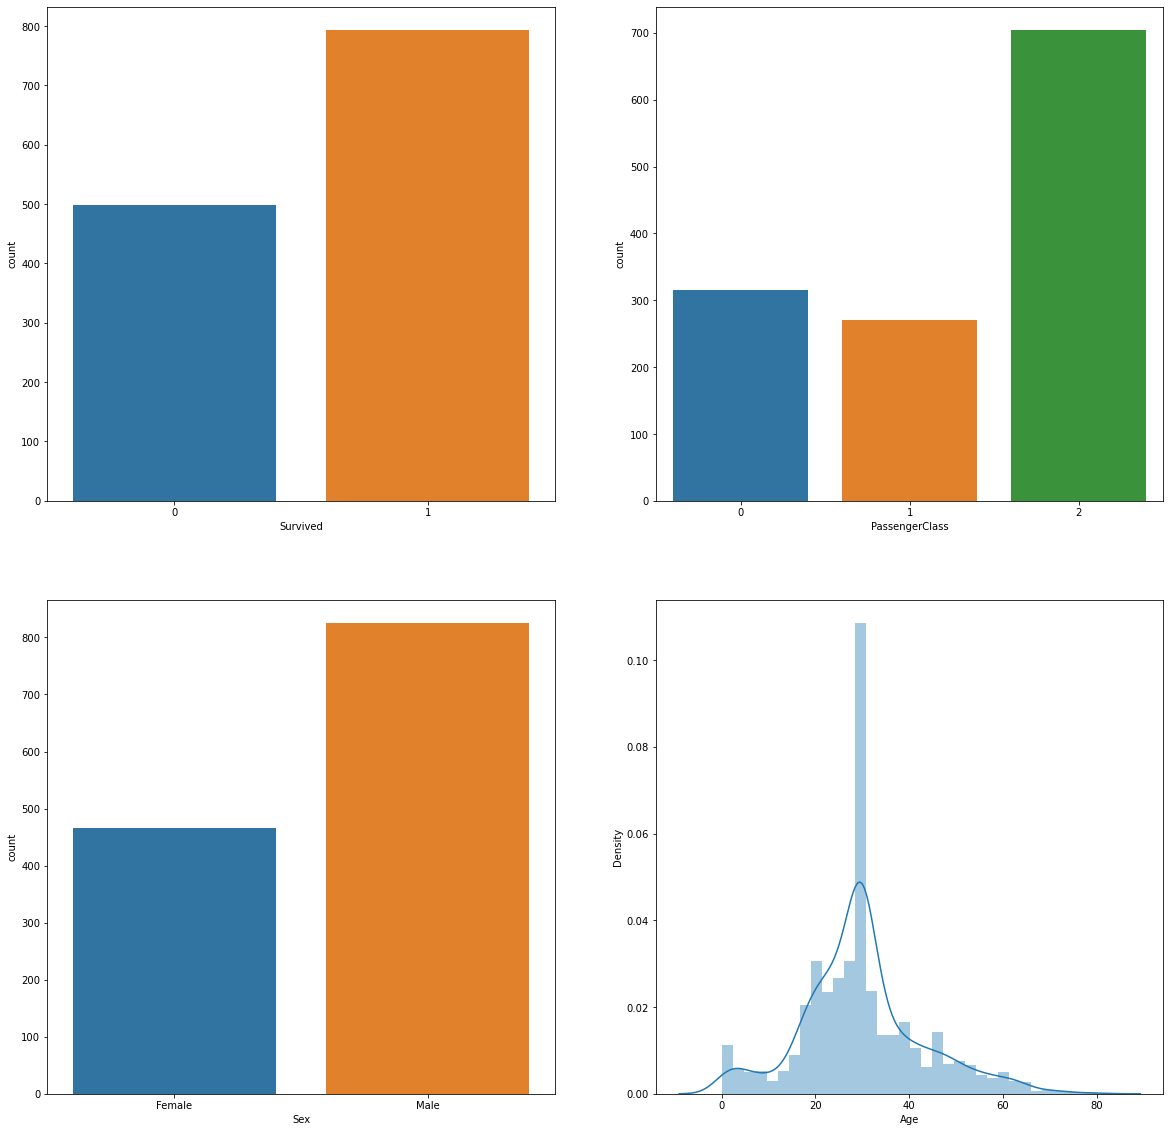

In [77]:
cnv, ax = plt.subplots(2,2, figsize = (20,20))
sns.countplot('Survived', data = df, ax = ax[0][0])
sns.countplot('PassengerClass', data = df, ax = ax[0][1])
sns.countplot('Sex', data = df, ax = ax[1][0])
sns.distplot(df['Age'], kde = True, ax = ax [1][1])

In [78]:
### Insights from Univariate Analysis:

### More people survived
### The ship had more Third class bookings
### The ship had more Males than females
### The Ship had more people in the age group around 30

# Correlation Matrix

In [79]:
cormat = df.corr()
cormat

,PassengerClass,Age,NoOfSiblings,Noofparents or ChildernOnboard,Survived
PassengerClass,1.000000,-0.369410,0.058156,0.015461,0.320858
Age,-0.369410,1.000000,-0.189469,-0.129159,0.048081
NoOfSiblings,0.058156,-0.189469,1.000000,0.371723,0.031760
Noofparents or ChildernOnboard,0.015461,-0.129159,0.371723,1.000000,-0.079713
Survived,0.320858,0.048081,0.031760,-0.079713,1.000000


<AxesSubplot:>

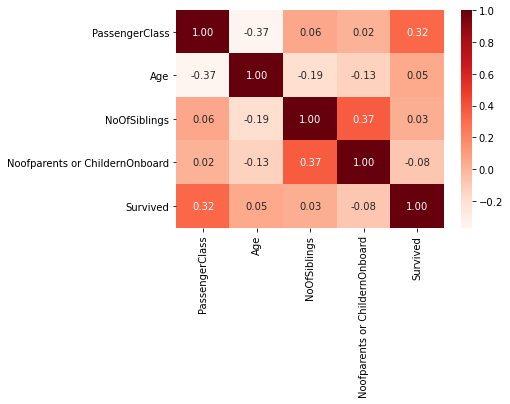

In [80]:
sns.heatmap(cormat, annot = True, fmt = '.2f', cmap = 'Reds')

# Survived column analysis

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    793
0    498
Name: Survived, dtype: int64

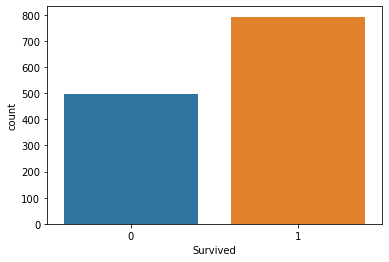

In [81]:
sns.countplot('Survived', data = df)
df['Survived'].value_counts()

<AxesSubplot:ylabel='Survived'>

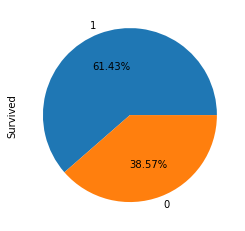

In [82]:
df['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

In [83]:
# Insight#2

# Survival rate - 61.43%
# Death rate - 38.57%

# Passenger class Vs Survival

In [84]:
df.groupby(['PassengerClass', 'Survived'])['Survived'].count()

PassengerClass  Survived
0               0           199
                1           117
1               0           119
                1           152
2               0           180
                1           524
Name: Survived, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PassengerClass', ylabel='count'>

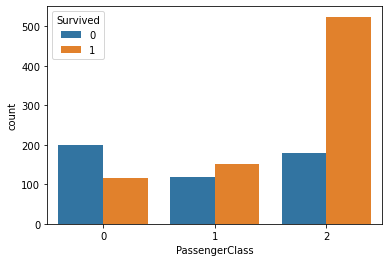

In [85]:
sns.countplot('PassengerClass', data = df, hue = 'Survived')

In [86]:
# Insight# 3
# Survival rate is considerably more among 3rd class passengers
# Overall 1st class passengers had more number of deaths 

# Gender Vs Survival Analysis

In [87]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
Female  0           339
        1           127
Male    0           159
        1           666
Name: Survived, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

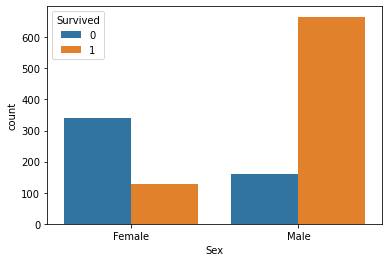

In [88]:
sns.countplot('Sex', data = df, hue = 'Survived')

<AxesSubplot:ylabel='Sex'>

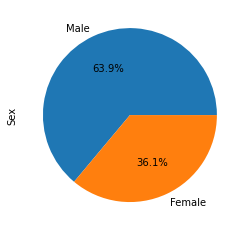

In [89]:
df['Sex'].value_counts().plot.pie(autopct = '%1.1f%%')

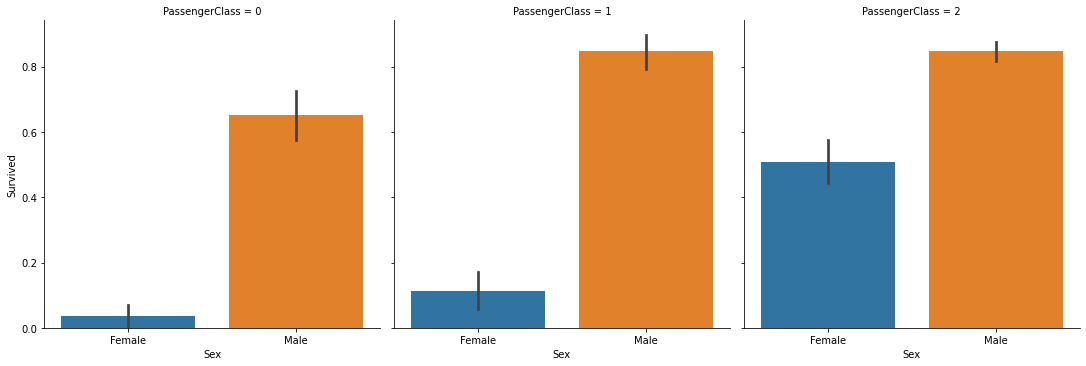

In [90]:
sns.catplot(x = 'Sex', y = 'Survived', kind = 'bar', data = df, col = 'PassengerClass')

In [91]:
# Insight# 4
# Although around 64% of the passengers were Male, most of the non-survived people were women
# Overall Male survived more than women in all the passenger classes


# Age Analysis

Text(0.5, 0, 'Age')

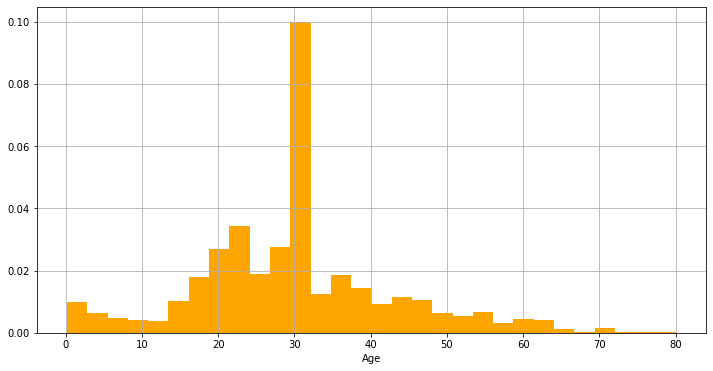

In [92]:
df['Age'].hist(bins = 30,density = True, color = 'Orange', figsize = (12,6))
plt.xlabel('Age')

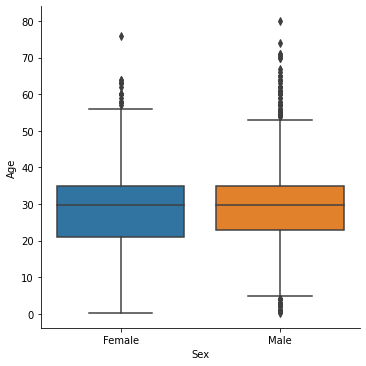

In [93]:
sns.catplot(x = 'Sex', y ='Age', data = df, kind = 'box')

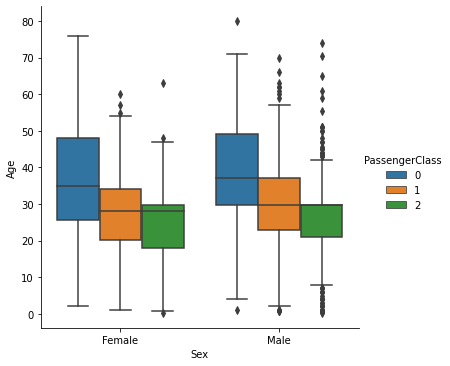

In [94]:
sns.catplot(x = 'Sex', y ='Age', data = df, kind = 'box', hue = 'PassengerClass')

In [95]:
# Insight# 5
# Most of the passengers in travel belong to 20 to 35 years age group


# Passenger class vs Survival

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


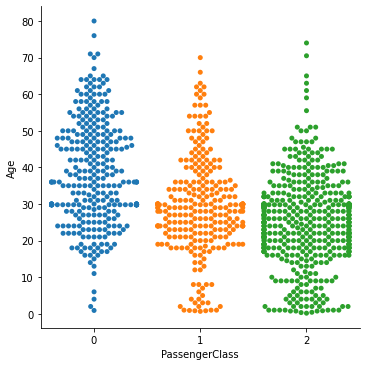

In [96]:
sns.catplot(x = 'PassengerClass', y ='Age', data = df, kind = 'swarm')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


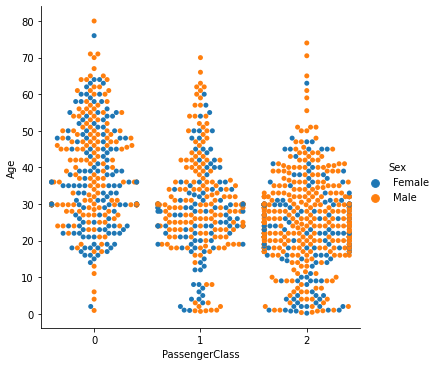

In [97]:
sns.catplot(x = 'PassengerClass', y ='Age', data = df, kind = 'swarm', hue = 'Sex')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


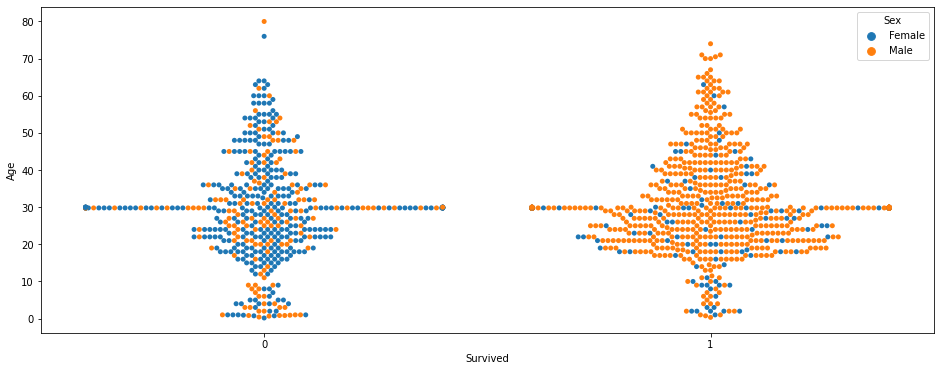

In [98]:
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Survived', y = 'Age' , data = df, hue= 'Sex')
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


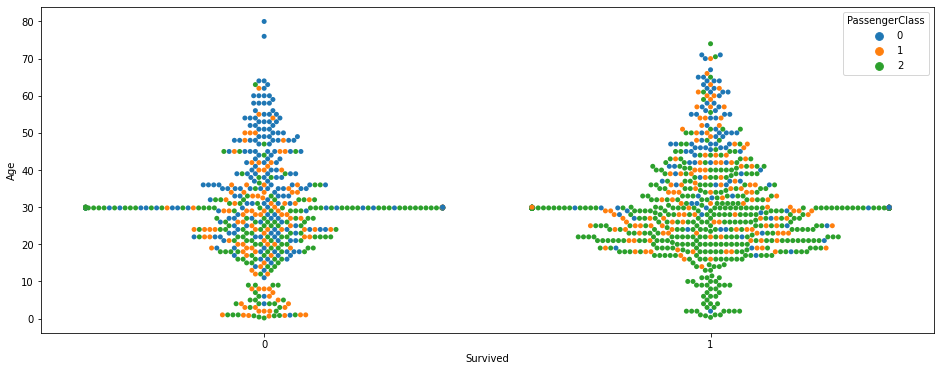

In [99]:
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Survived', y = 'Age' , data = df, hue= 'PassengerClass')
plt.show()

In [100]:
# Insight# 5 
# Most of Mens managed to escape from the tragedy!!!
# More people travelled in the age group - 30 years

<AxesSubplot:xlabel='PassengerClass', ylabel='count'>

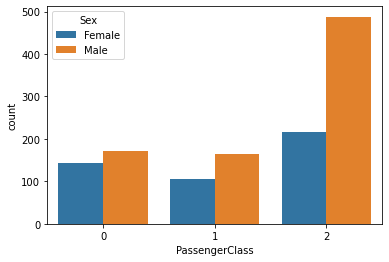

In [101]:
sns.countplot(x = 'PassengerClass', data = df,  hue = 'Sex')

In [102]:
# Insight# 6
# Most people belonged to 3rd class with male as the clear majority

# PortOfEmbarkation Vs Survived

In [103]:
df.columns

Index(['PassengerClass', 'Sex', 'Age', 'NoOfSiblings',
       'Noofparents or ChildernOnboard', 'PassengerFare', 'PortOfEmbarkation',
       'Survived'],
      dtype='object')

In [104]:
df.groupby(['PortOfEmbarkation', 'Survived'])['Survived'].count()

PortOfEmbarkation  Survived
Cherbourg          0           152
                   1           120
Queenstown         0            44
                   1            79
Southampton        0           302
                   1           594
Name: Survived, dtype: int64

<AxesSubplot:xlabel='PortOfEmbarkation', ylabel='count'>

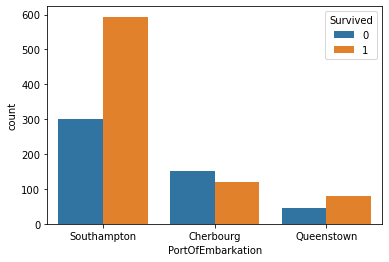

In [105]:
sns.countplot(x = 'PortOfEmbarkation', data = df,  hue = 'Survived')

In [106]:
# Insight# 7
# Southampton seems to be the most popular or the biggest yard according to the figure below and most survived here

# Family Vs Survival

In [55]:
df.groupby(['Noofparents or ChildernOnboard', 'Survived'])['Survived'].count()

Noofparents or ChildernOnboard  Survived
0                               No          334
                                Yes         650
1                               No          100
                                Yes          70
2                               No           57
                                Yes          56
3                               No            5
                                Yes           3
4                               No            1
                                Yes           5
5                               No            1
                                Yes           5
6                               Yes           2
9                               Yes           2
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Noofparents or ChildernOnboard', ylabel='count'>

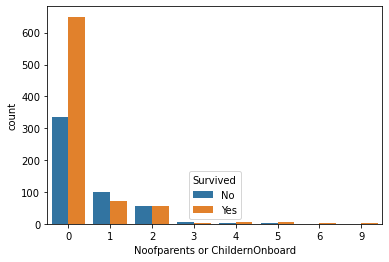

In [51]:
sns.countplot(x = 'Noofparents or ChildernOnboard', data = df,  hue = 'Survived')

<AxesSubplot:xlabel='NoOfSiblings', ylabel='count'>

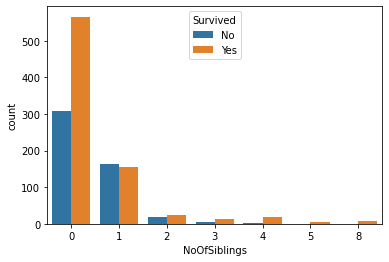

In [53]:
sns.countplot(x = 'NoOfSiblings', data = df,  hue = 'Survived')

In [54]:
# Insight# 8
# Most of the people travelling were without family

# Conclusion:
    If you were travelling in this ship, the chances for your survival is high if you are a male travelling in Third Passenger Class probably without family.